# Linear Regression Model: Inner Melbourne Unit Rent

## Introduction

This project demonstrates the development and evaluation of a linear regression model to predict median unit rent based on key features such as the number of bedrooms and suburb identifiers. It involves preprocessing techniques such as feature selection, data scaling, and splitting data into training and test sets to ensure robust model evaluation. The model provides insights into rental trends, demonstrating application of linear regression in the real estate field. 

## Table of Contents

1. [Import the data](#Import-the-data)
2. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
3. [Clean the data](#Clean-the-data)
4. [Linear Regression](#Linear-Regression)
5. [Splitting the data](#Splitting-the-data)
6. [Training the model](#Training-the-model)
7. [Predicting Test Data](#Predicting-Test-Data)
8. [Model Evaluation](#Model-Evaluation)
9. [Residuals](#Residuals)
10. [More predictions](#More-predictions)
11. [Conclusion](#Conclusion)

## Import the data

In [11]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Read data
df = pd.read_csv("Inner Melbourne Rent Data Set(Sheet1).csv")

In [13]:
df.head()

,Inner Melbourne Suburb,Count,Median,Ann % Ch,Percentile 25,Percentile 75,5 yr % ch,Ave 5 yr % ch,Bed Rooms
0,Albert Park-Middle Park-West St Kilda,194.0,425.0,0.18,375.0,475.0,0.21,0.04,1.0
1,Armadale,154.0,430.0,0.19,380.0,490.0,0.19,0.04,1.0
2,Carlton North,41.0,400.0,0.08,370.0,430.0,0.11,0.02,1.0
3,Carlton-Parkville,1031.0,450.0,0.13,390.0,540.0,0.14,0.03,1.0
4,CBD-St Kilda Rd,6109.0,550.0,0.22,470.0,610.0,0.25,0.05,1.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Inner Melbourne Suburb  66 non-null     object 
 1   Count                   66 non-null     float64
 2   Median                  66 non-null     float64
 3   Ann % Ch                66 non-null     float64
 4   Percentile 25           66 non-null     float64
 5   Percentile 75           66 non-null     float64
 6   5 yr % ch               66 non-null     float64
 7   Ave 5 yr % ch           66 non-null     float64
 8   Bed Rooms               66 non-null     float64
dtypes: float64(8), object(1)
memory usage: 4.8+ KB


In [15]:
df.describe()

,Count,Median,Ann % Ch,Percentile 25,Percentile 75,5 yr % ch,Ave 5 yr % ch,Bed Rooms
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,645.484848,662.090909,0.159394,585.696970,766.727273,0.188939,0.038182,2.000000
std,1134.345494,198.531666,0.047970,173.876611,260.766181,0.065917,0.013233,0.822753
min,17.000000,395.000000,0.050000,350.000000,430.000000,0.030000,0.010000,1.000000
25%,113.250000,495.500000,0.122500,451.250000,550.000000,0.160000,0.030000,1.000000
50%,256.500000,635.000000,0.160000,560.000000,710.000000,0.180000,0.040000,2.000000
75%,756.000000,850.000000,0.190000,723.750000,983.250000,0.210000,0.040000,3.000000
max,6750.000000,1100.000000,0.310000,950.000000,1375.000000,0.400000,0.080000,3.000000


In [16]:
df_encoded = pd.get_dummies(df, columns=['Inner Melbourne Suburb'], prefix='Suburb')

## Exploratory Data Analysis

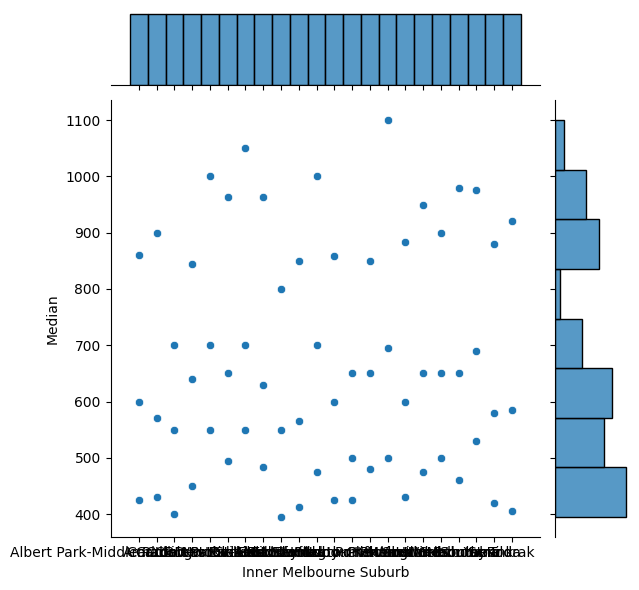

In [17]:
sns.jointplot(x="Inner Melbourne Suburb", y="Median", data=df)

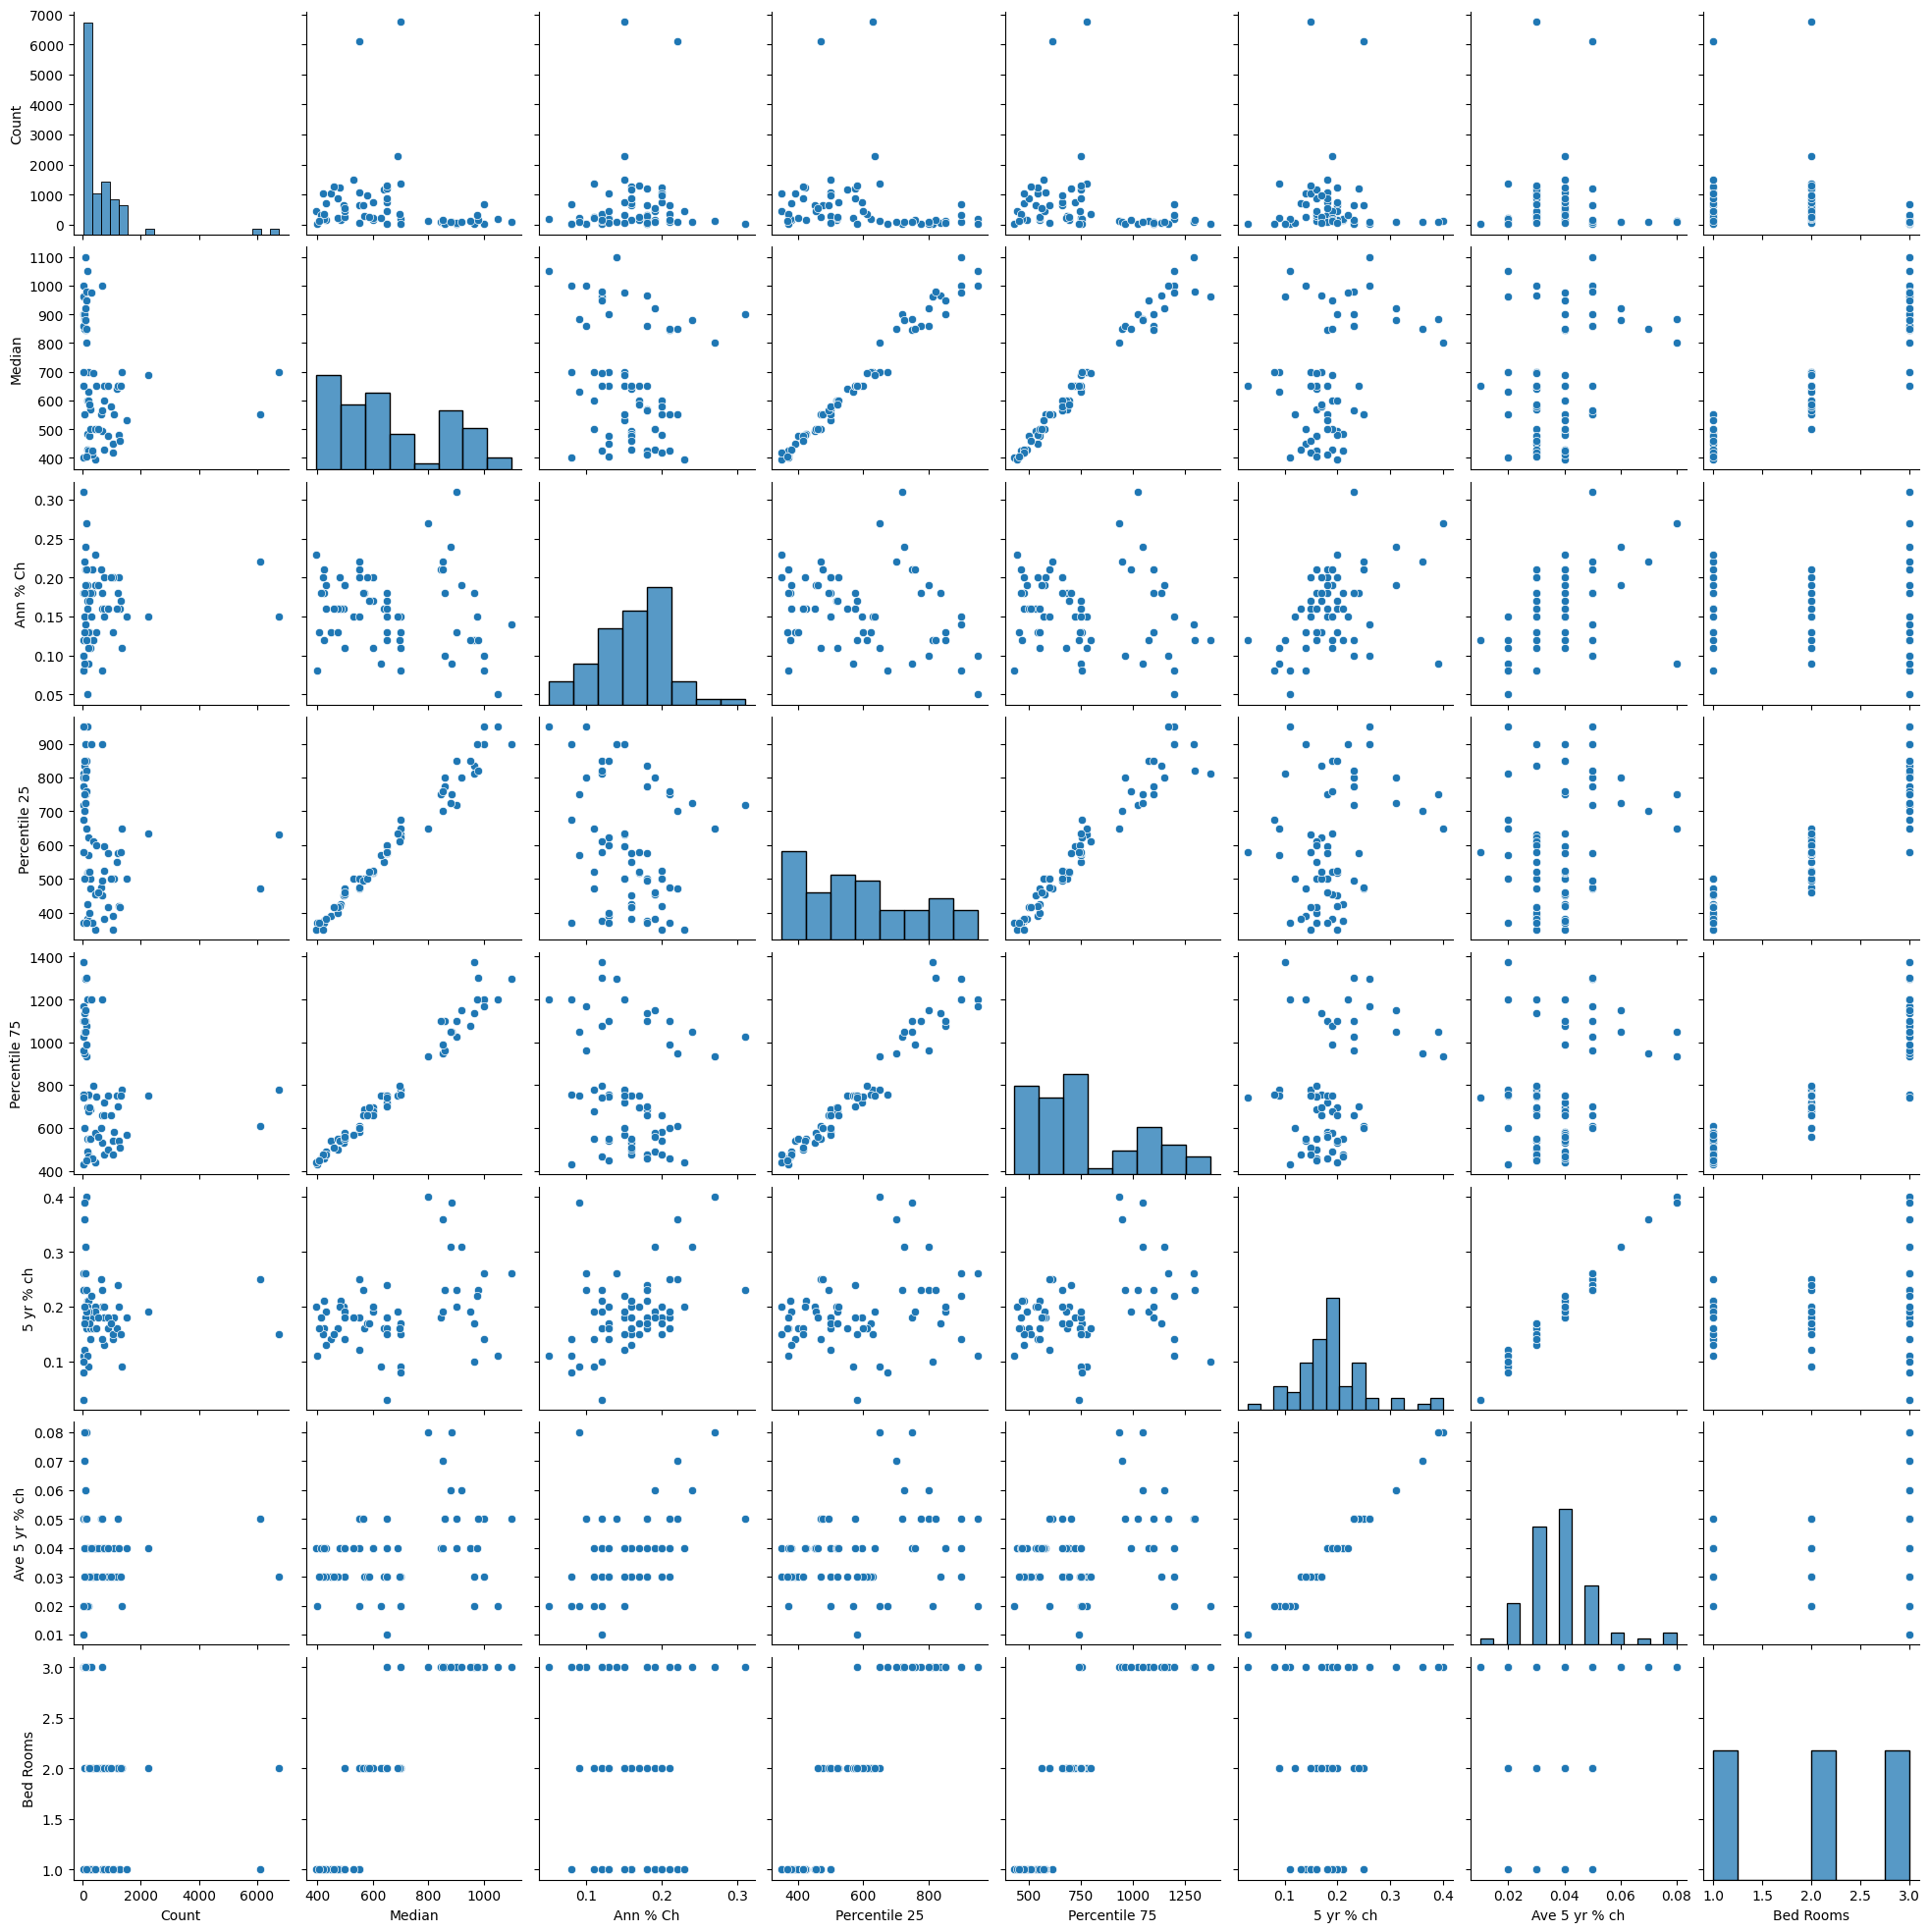

In [18]:
sns.pairplot(df, kind='scatter')

## Clean the data

<Axes: >

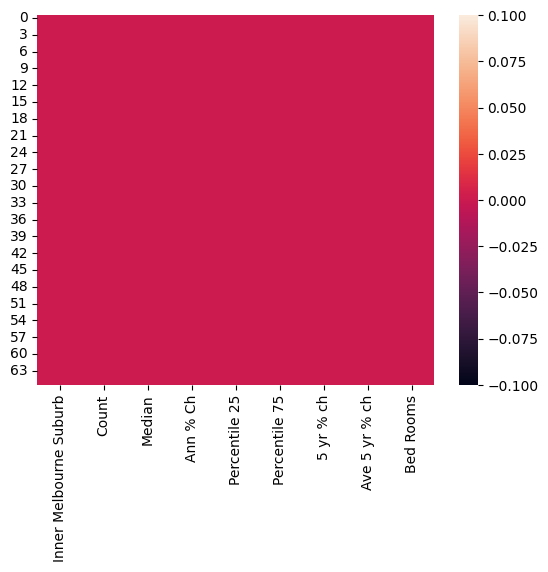

In [19]:
sns.heatmap(df.isnull())

In [20]:
# Create a dictionary mapping each suburb to a unique integer
suburb_mapping = {suburb: i + 1 for i, suburb in enumerate(df["Inner Melbourne Suburb"].unique())}

# Add a new column to the DataFrame using the mapping
df["Suburb ID"] = df["Inner Melbourne Suburb"].map(suburb_mapping)

# Check the updated DataFrame
print(df.head(45))

                   Inner Melbourne Suburb   Count  Median  Ann % Ch  \
0   Albert Park-Middle Park-West St Kilda   194.0   425.0      0.18   
1                                Armadale   154.0   430.0      0.19   
2                           Carlton North    41.0   400.0      0.08   
3                       Carlton-Parkville  1031.0   450.0      0.13   
4                         CBD-St Kilda Rd  6109.0   550.0      0.22   
5                  Collingwood-Abbotsford   665.0   494.0      0.16   
6                               Docklands  1086.0   550.0      0.20   
7                          East Melbourne   172.0   483.0      0.16   
8                           East St Kilda   452.0   395.0      0.23   
9                                  Elwood   338.0   413.0      0.18   
10                                Fitzroy   233.0   475.0      0.13   
11             Fitzroy North-Clifton Hill   198.0   425.0      0.12   
12                  Flemington-Kensington   352.0   425.0      0.21   
13    

In [21]:
df

,Inner Melbourne Suburb,Count,Median,Ann % Ch,Percentile 25,Percentile 75,5 yr % ch,Ave 5 yr % ch,Bed Rooms,Suburb ID
0,Albert Park-Middle Park-West St Kilda,194.0,425.0,0.18,375.0,475.0,0.21,0.04,1.0,1
1,Armadale,154.0,430.0,0.19,380.0,490.0,0.19,0.04,1.0,2
2,Carlton North,41.0,400.0,0.08,370.0,430.0,0.11,0.02,1.0,3
3,Carlton-Parkville,1031.0,450.0,0.13,390.0,540.0,0.14,0.03,1.0,4
4,CBD-St Kilda Rd,6109.0,550.0,0.22,470.0,610.0,0.25,0.05,1.0,5
...,...,...,...,...,...,...,...,...,...,...
61,South Melbourne,78.0,900.0,0.13,850.0,1100.0,0.20,0.04,3.0,18
62,South Yarra,147.0,980.0,0.12,820.0,1300.0,0.23,0.05,3.0,19
63,Southbank,315.0,975.0,0.15,900.0,1200.0,0.22,0.04,3.0,20
64,St Kilda,95.0,880.0,0.24,725.0,1050.0,0.31,0.06,3.0,21


<Axes: xlabel='Suburb ID'>

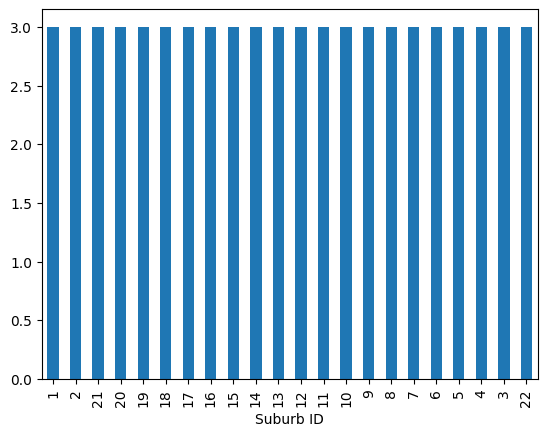

In [22]:
df["Suburb ID"] = df['Suburb ID'].astype("int", copy=False)
df["Suburb ID"].value_counts().plot(kind="bar")

In [23]:
df.median

<bound method DataFrame.median of                    Inner Melbourne Suburb   Count  Median  Ann % Ch  \
0   Albert Park-Middle Park-West St Kilda   194.0   425.0      0.18   
1                                Armadale   154.0   430.0      0.19   
2                           Carlton North    41.0   400.0      0.08   
3                       Carlton-Parkville  1031.0   450.0      0.13   
4                         CBD-St Kilda Rd  6109.0   550.0      0.22   
..                                    ...     ...     ...       ...   
61                        South Melbourne    78.0   900.0      0.13   
62                            South Yarra   147.0   980.0      0.12   
63                              Southbank   315.0   975.0      0.15   
64                               St Kilda    95.0   880.0      0.24   
65                                 Toorak    91.0   920.0      0.19   

    Percentile 25  Percentile 75  5 yr % ch  Ave 5 yr % ch  Bed Rooms  \
0           375.0          475.0       0

## Linear Regression

In [24]:
# divide into target variable and predictors
y = df["Median"] #our target variable
X = df.drop(["Median", "Inner Melbourne Suburb", "Count", "Ann % Ch", "Percentile 25", "Percentile 75", "5 yr % ch", "Ave 5 yr % ch"], axis = 1)

In [25]:
X

,Bed Rooms,Suburb ID
0,1.0,1
1,1.0,2
2,1.0,3
3,1.0,4
4,1.0,5
...,...,...
61,3.0,18
62,3.0,19
63,3.0,20
64,3.0,21


In [26]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

# X_scaled is now a numpy array with normalized data

In [27]:
X_scaled

array([[-1.22474487, -1.65503185],
       [-1.22474487, -1.49740977],
       [-1.22474487, -1.33978769],
       [-1.22474487, -1.18216561],
       [-1.22474487, -1.02454353],
       [-1.22474487, -0.86692145],
       [-1.22474487, -0.70929937],
       [-1.22474487, -0.55167728],
       [-1.22474487, -0.3940552 ],
       [-1.22474487, -0.23643312],
       [-1.22474487, -0.07881104],
       [-1.22474487,  0.07881104],
       [-1.22474487,  0.23643312],
       [-1.22474487,  0.3940552 ],
       [-1.22474487,  0.55167728],
       [-1.22474487,  0.70929937],
       [-1.22474487,  0.86692145],
       [-1.22474487,  1.02454353],
       [-1.22474487,  1.18216561],
       [-1.22474487,  1.33978769],
       [-1.22474487,  1.49740977],
       [-1.22474487,  1.65503185],
       [ 0.        , -1.65503185],
       [ 0.        , -1.49740977],
       [ 0.        , -1.33978769],
       [ 0.        , -1.18216561],
       [ 0.        , -1.02454353],
       [ 0.        , -0.86692145],
       [ 0.        ,

## Splitting the data

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 42)

In [29]:
X_test

array([[ 1.22474487, -0.07881104],
       [ 1.22474487,  1.18216561],
       [-1.22474487, -1.65503185],
       [ 1.22474487, -1.49740977],
       [-1.22474487, -0.86692145],
       [ 1.22474487,  1.33978769],
       [-1.22474487,  0.86692145],
       [-1.22474487,  0.23643312],
       [ 1.22474487,  1.65503185],
       [ 0.        , -0.3940552 ],
       [ 0.        ,  0.07881104],
       [-1.22474487, -0.23643312],
       [ 0.        ,  1.33978769],
       [-1.22474487,  0.3940552 ],
       [ 0.        ,  0.23643312],
       [ 0.        , -1.18216561],
       [-1.22474487, -1.18216561],
       [-1.22474487,  1.02454353],
       [ 0.        ,  1.18216561],
       [-1.22474487, -0.3940552 ]])

## Training the model

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lm = LinearRegression()

In [32]:
lm.fit(X_train, y_train)

LinearRegression()

In [33]:
lm.coef_

array([174.52735028,   2.21236469])

In [34]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coef'])
print(cdf)

                 Coef
Bed Rooms  174.527350
Suburb ID    2.212365


## Predicting Test Data

In [35]:
pred = lm.predict(X_test)
pred

array([874.1320623 , 876.92180252, 443.14193269, 870.99360456,
       444.88552032, 877.27052005, 448.72141312, 447.32654301,
       877.9679551 , 659.68315008, 660.72930266, 446.28039043,
       663.51904288, 447.67526054, 661.07802019, 657.93956244,
       444.18808527, 449.07013065, 663.17032535, 445.9316729 ])

Text(0.5, 1.0, 'Evaluation of our LM model')

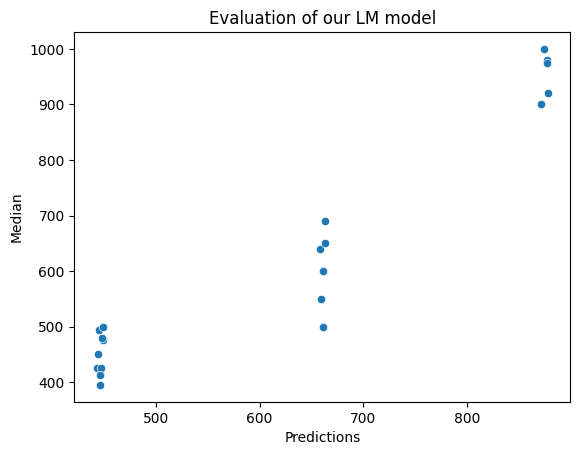

In [36]:
sns.scatterplot(x=pred,y= y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of our LM model")

## Model Evaluation

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [38]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, pred))
print("Mean Squared Error: ", mean_squared_error(y_test, pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error:  53.796775121606835
Mean Squared Error:  4639.630156311241
RMSE:  68.11483066345568


## Residuals

In [39]:
residuals = y_test - pred
residuals

54    125.867938
62    103.078197
0     -18.141933
45     29.006395
5      49.114480
63     97.729480
16     26.278587
12    -22.326543
65     42.032045
30   -109.683150
33    -60.729303
9     -33.280390
41     26.480957
13     32.324739
34   -161.078020
25    -17.939562
3       5.811915
17     50.929869
40    -13.170325
8     -50.931673
Name: Median, dtype: float64

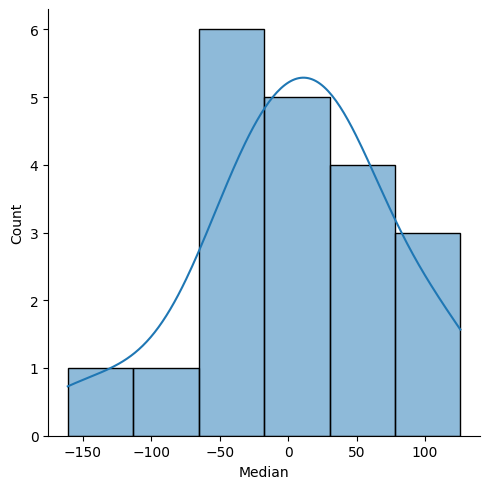

In [40]:
sns.displot(residuals, kde = True)

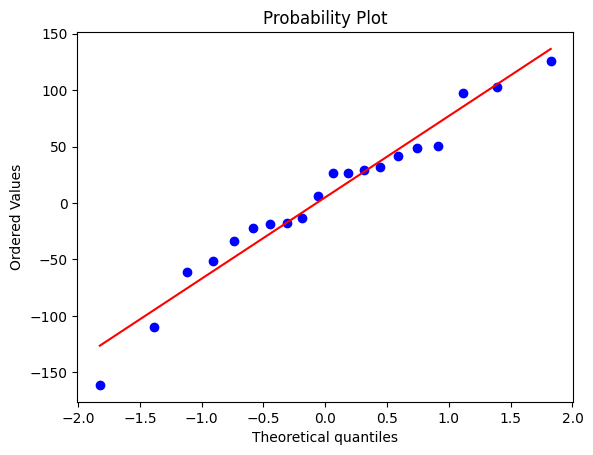

In [41]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot = pylab)
pylab.show()

## More predictions

In [42]:
new_df = pd.DataFrame({'Bed Rooms': [3.0], 'Suburb ID':[20]})
newX = scaler.transform(new_df)
newX

array([[1.22474487, 1.33978769]])

In [43]:
pred = lm.predict(newX)
pred

array([877.27052005])

## Conclusion

This project demonstrates a linear regression model to predict median unit rent prices in Melbourne's suburbs based on various factors. Through data preprocessing, exploratory analysis, and rigorous model evaluation, the pipeline demonstrated the ability to extract actionable insights into housing trends. The analysis identified key predictors influencing rental prices and provided a foundation for data-driven decision-making in real estate. This project highlights strong proficiency in machine learning, statistical analysis, and visualization, showcasing the capability to apply these techniques to solve real-world problems and deliver impactful results.
